In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pickle
import os.path

def savedb(obj,filename):
    with open(filename,'wb') as file:
        pickle.dump(obj,file)
    
def loaddb(filename):
    with open(filename,'rb') as file:
        obj = pickle.load(file)
        return obj
    
def pickle_exist(hs, bs, lr, reg, num_epoch):
    filename = f'pickle/{hs}-{bs}-{lr}-{reg}-{num_epoch}.pickle'
    if os.path.isfile(filename):
        return True
    return False

def save_pickle(hs, bs, lr, reg, num_epoch, val_acc, W1, stats, dtype = np.half):
    W1 = dtype(W1)
    for key in stats.keys():
        stats[key] = dtype(stats[key])
    obj = (hs, bs, lr, reg, num_epoch, val_acc, W1, stats)
    filename = f'pickle/{hs}-{bs}-{lr}-{reg}-{num_epoch}.pickle'
    savedb(obj,filename)
    
def get_pickle(hs, bs, lr, reg, num_epoch):
    filename = f'pickle/{hs}-{bs}-{lr}-{reg}-{num_epoch}.pickle'
    return loaddb(filename)

In [3]:
from cs231n.vis_utils import visualize_grid

dtype = np.half

def showTraining(stats):
    plt.subplot(2, 1, 1)
    plt.plot(dtype(stats['loss_history']))
    plt.title('Loss history')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')

    plt.subplot(2, 1, 2)
    plt.plot(dtype(stats['train_acc_history']), label='train')
    plt.plot(dtype(stats['val_acc_history']), label='val')
    plt.title('Classification accuracy history')
    plt.xlabel('Epoch')
    plt.ylabel('Classification accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
def show_net_weights(W1):
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    W1 = W1.astype(dtype)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

In [4]:
hidden_size = [3, 5, 10, 50, 150]
# batch_size = [10, 50, 100, 200, 300, 400]
batch_size = [10, 50, 100, 200, 400]
# learning_rate = [4.5e-3, 4e-3, 3.5e-3, 3e-3, 2e-3, 1e-3, 5e-4, 1e-4]
learning_rate = [4e-3, 3e-3, 1e-3, 5e-4, 1e-4]
# regularization = [0, 0.1, 0.5, 1, 3, 5, 10]
regularization = [0, 0.1, 0.5, 1, 10]
num_epoch = 8

dtype = np.half
for lr in learning_rate:
    for bs in batch_size:
        for hs in hidden_size:
            for reg in regularization:
                if pickle_exist(hs, bs, lr, reg, num_epoch):
                    hs, bs, lr, reg, num_epoch, val_acc, W1, stats = get_pickle(hs, bs, lr, reg, num_epoch)
#                     print(f'For hs={hs}, bs={bs}, lr={lr}, reg={reg}, val_acc = {val_acc}')
#                     showTraining(stats)
#                     show_net_weights(W1)
                else:
                    print(f'For hs={hs}, bs={bs}, lr={lr}, reg={reg}, there is no data')

For hs=5, bs=10, lr=0.0005, reg=0.1, val_acc = 0.313


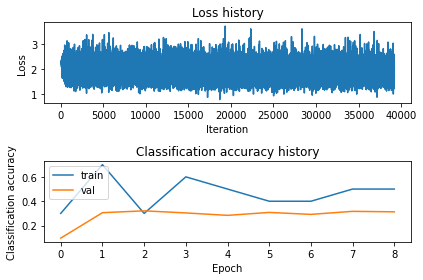

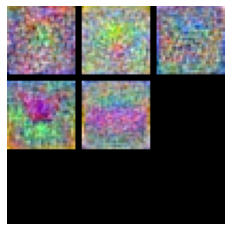

In [5]:
import random

hs = random.choice(hidden_size)
bs = random.choice(batch_size)
lr = random.choice(learning_rate)
reg = random.choice(regularization)
hs, bs, lr, reg, num_epoch, val_acc, W1, stats = get_pickle(hs, bs, lr, reg, num_epoch)
print(f'For hs={hs}, bs={bs}, lr={lr}, reg={reg}, val_acc = {val_acc}')
showTraining(stats)
show_net_weights(W1)